### Notes 

1. The Williams banana (commercially cultivated dessert banana) is variety of the Cavendish group

2. **NIR interactions**: NIR (Near-Infrared) interaction refers to how near-infrared light (wavelengths from roughly 780 to 2500 nanometers) 

3. The column headers in the dataset (350, 351, 352, etc.) represent the wavelength in nanometers (nm). The reason they start outside the theoretical NIR range is that the data was likely collected using a Vis-NIR (Visible-Near Infrared) spectrometer. 

4. Data starts at 350 nm, this falls into the UV-A (Ultraviolet-A) and Visible (violet light) parts of the electromagnetic spectrum.

5. The numbers within the cells (e.g., 6.10E-02) are the absorbance or reflectance values. They are typically unitless and represent how much light was absorbed or reflected by the sample at that specific wavelength.

In [18]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset

df = pd.read_excel('Datos1_InteraccionesNIR.xlsx') 

df.head()

,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,Control,2,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,0.047413,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,Control,3,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,0.049205,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,Control,4,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,0.038449,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,Control,5,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,0.048921,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205



6. **Row Pattern**: 
   - Data is organized in groups of 30 rows
   - Each group represents a complete set of plant measurements
   - Plant indices cycle from 1 to 30 before repeating
   - Treatment conditions change after each 30-row cycle

Let's proceed with visualizing this data structure to better understand the patterns and relationships between treatments and measurements.


In [19]:
# Display basic information about the dataset
print("Dataset Information:")
print("")
print(df.info())
print("\nDataset Shape:", df.shape)

# Display first and last few rows with better formatting
print("\nSample of the data:")
print("")
display(df)

# lets see the types of each column
print("\nColumn Data Types:")
print("")
print(df.dtypes)

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 2153 entries, Tratamiento to 2500
dtypes: float64(2151), int64(1), object(1)
memory usage: 3.9+ MB
None

Dataset Shape: (239, 2153)

Sample of the data:



,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044963,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752
1,Control,2,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,0.047413,...,0.037656,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570
2,Control,3,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,0.049205,...,0.036252,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058
3,Control,4,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,0.038449,...,0.033894,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376
4,Control,5,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,0.048921,...,0.033897,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Fus_EH_Ral,26,0.057063,0.059019,0.048959,0.052269,0.056879,0.056852,0.052870,0.050356,...,0.040929,0.040795,0.040768,0.040668,0.040614,0.040498,0.040285,0.040192,0.040172,0.040053
235,Fus_EH_Ral,27,0.043311,0.046784,0.044599,0.046683,0.049327,0.049389,0.045266,0.040867,...,0.038794,0.038626,0.038348,0.038184,0.038121,0.038045,0.037970,0.037882,0.037866,0.037735
236,Fus_EH_Ral,28,0.059954,0.058892,0.053552,0.058789,0.064082,0.064322,0.060020,0.056157,...,0.052576,0.052374,0.052096,0.051908,0.051822,0.051660,0.051462,0.051327,0.051201,0.051083
237,Fus_EH_Ral,29,0.056337,0.056842,0.052092,0.054301,0.056672,0.055743,0.051817,0.050592,...,0.048587,0.048425,0.048334,0.048168,0.048052,0.047933,0.047718,0.047609,0.047601,0.047518



Column Data Types:

Tratamiento     object
Planta           int64
350            float64
351            float64
352            float64
                ...   
2496           float64
2497           float64
2498           float64
2499           float64
2500           float64
Length: 2153, dtype: object


### Single Plant Analysis

Now let's create a plot with the information from just one plant to analyze how the data behaves.

_This visualization will help us understand the spectral response patterns of an individual specimen._

In [20]:
first_plant = df.iloc[0]
print(first_plant)

Tratamiento     Control
Planta                1
350             0.06103
351            0.060394
352            0.053344
                 ...   
2496           0.044198
2497           0.044046
2498           0.043928
2499           0.043878
2500           0.043752
Name: 0, Length: 2153, dtype: object


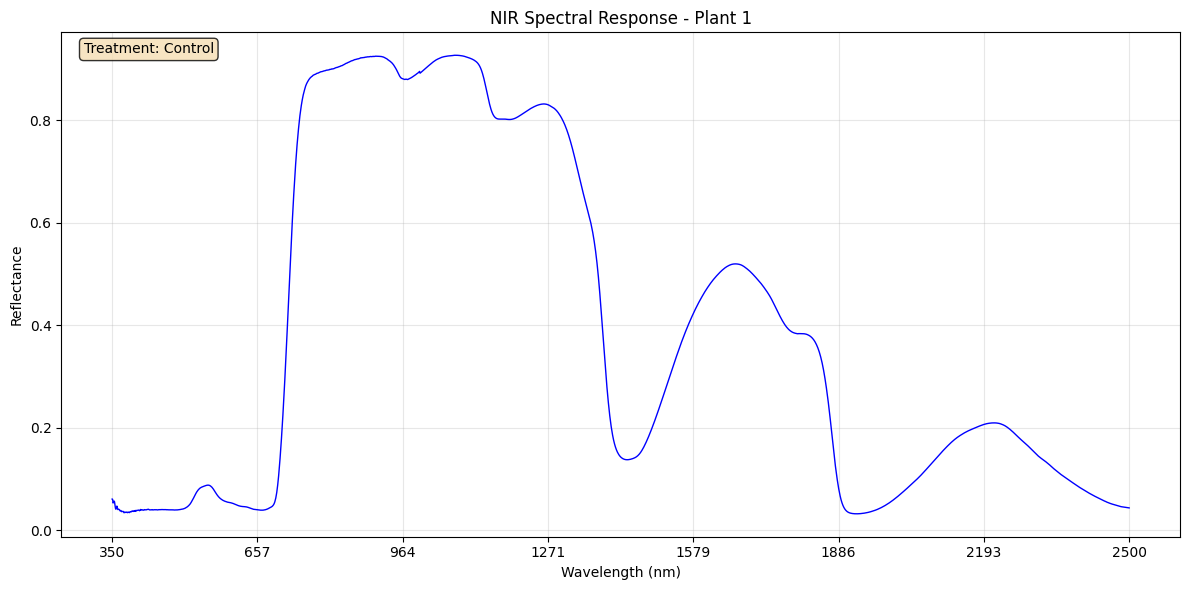

In [32]:
# Get first plant data (row 0)
first_plant = df.iloc[0]
treatment = first_plant['Tratamiento']

# Extract wavelengths (column names from 350 to 2500)
wavelengths = [int(col) for col in df.columns if str(col).isdigit()]
absorbance_values = first_plant[wavelengths].values

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, absorbance_values, 'b-', linewidth=1)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title(f'NIR Spectral Response - Plant 1')
plt.text(0.02, 0.98, f'Treatment: {treatment}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

From this initial data visualization, we can already see a strong reflectance in wavelengths ranging from approximately 657 to 1300 nm. The spectral response also shows several interesting spikes at specific wavelengths across the measured spectrum.

### Multiple Plant Analysis